In [1]:
!python -m pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [2]:
!pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'annoy' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'annoy'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for annoy: filename=annoy-1.17.3-cp311-cp311-linux_x86_64.whl size=553317 sha256=a4d9d3bcad841026361fc78103323f42c00c05e3e86977eee0f60d4249d93a6e
  Stored in directory: /root/.cache/pip/wheels/33/e5/58/0a3e34b92bedf09b4c57e37a63ff395ade6f6c1099ba59877c
Successfully built annoy


In [3]:
# Importing Required Libraries
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
from annoy import AnnoyIndex
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [5]:
# Load Digits Dataset
digits = load_digits()

In [6]:
num_images = digits.data.shape[0]
print(f"Total number of images in the Digits dataset: {num_images}")

num_rows, num_columns = digits.data.shape
print(f"Number of images (rows): {num_rows}")
print(f"Number of features (columns): {num_columns}")

print("\n Feature Names: \n")
print(digits.feature_names)

Total number of images in the Digits dataset: 1797
Number of images (rows): 1797
Number of features (columns): 64

 Feature Names: 

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [7]:
X, y = digits.data, digits.target
# Each image is 8x8 pixels = 64 features
print(f"Shape of images: {X.shape}")

Shape of images: (1797, 64)


In [8]:
# Split into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# List of K values to try
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19,21,23,25,27,29]
accuracies = []

In [15]:
def build_annoy_index(X_train, k):
    annoy_index = AnnoyIndex(X_train.shape[1], 'euclidean')
    for i in range(X_train.shape[0]):
        annoy_index.add_item(i, X_train[i])
    annoy_index.build(10)
    return annoy_index

In [16]:
# Train and evaluate ANN for each K
for k in k_values:
    annoy_index = build_annoy_index(X_train, k)
    y_pred = []
    for i in range(X_test.shape[0]):
        neighbors = annoy_index.get_nns_by_vector(X_test[i], k)
        neighbor_labels = y_train[neighbors]
        most_common_label = np.bincount(neighbor_labels).argmax()
        y_pred.append(most_common_label)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k} -> Accuracy: {acc:.4f}")

K=1 -> Accuracy: 0.9778
K=3 -> Accuracy: 0.9648
K=5 -> Accuracy: 0.9704
K=7 -> Accuracy: 0.9759
K=9 -> Accuracy: 0.9704
K=11 -> Accuracy: 0.9722
K=13 -> Accuracy: 0.9704
K=15 -> Accuracy: 0.9648
K=17 -> Accuracy: 0.9648
K=19 -> Accuracy: 0.9648
K=21 -> Accuracy: 0.9593
K=23 -> Accuracy: 0.9574
K=25 -> Accuracy: 0.9537
K=27 -> Accuracy: 0.9556
K=29 -> Accuracy: 0.9519


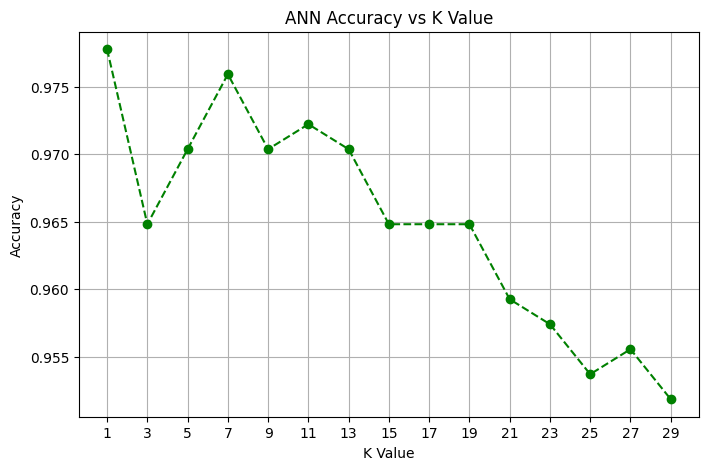

In [17]:
# Plot Accuracy vs K
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='--', color='green')
plt.title('ANN Accuracy vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [18]:
max_accuracy = max(accuracies)
min_accuracy = min(accuracies)

best_k = k_values[accuracies.index(max_accuracy)]
worst_k = k_values[accuracies.index(min_accuracy)]

print(f"\n Best K = {best_k} with Accuracy = {max_accuracy:.4f}")
print(f"\n Worst K = {worst_k} with Accuracy = {min_accuracy:.4f}")


 Best K = 1 with Accuracy = 0.9778

 Worst K = 29 with Accuracy = 0.9519
